In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline
x=pd.read_csv('datasets/x.csv')


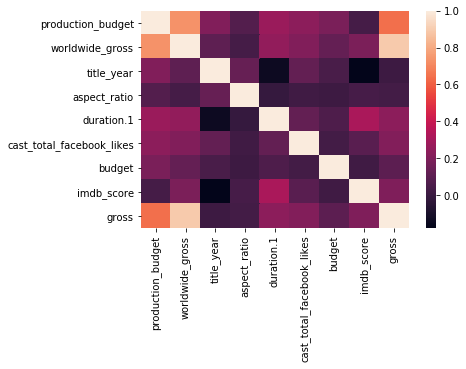

In [2]:
m=x.corr()
sns.heatmap(m)

In [3]:
y=x['worldwide_gross']
x=x.drop('worldwide_gross', axis=1)
x

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08
...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,4.247600e+05
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.007100e+04
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,4.831933e+07
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


In [4]:
from sklearn.linear_model import Lasso
model=Lasso()


In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [6]:
(len(x_train)/len(x))

0.75

In [7]:
model.fit(x_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [8]:
model.score(x_test,y_test)

0.7845783672167959

In [9]:
model.coef_

array([ 9.38278179e-01,  9.80845601e+05, -3.19528276e+06,  4.32209091e+04,
       -1.62594748e+02,  2.49641479e-03,  6.99849697e+06,  2.01314834e+00])

In [10]:
v=np.floor(np.log(np.abs(model.coef_)))

([<matplotlib.axis.XTick at 0x194951bbe48>,
 <a list of 7 Text xticklabel objects>)

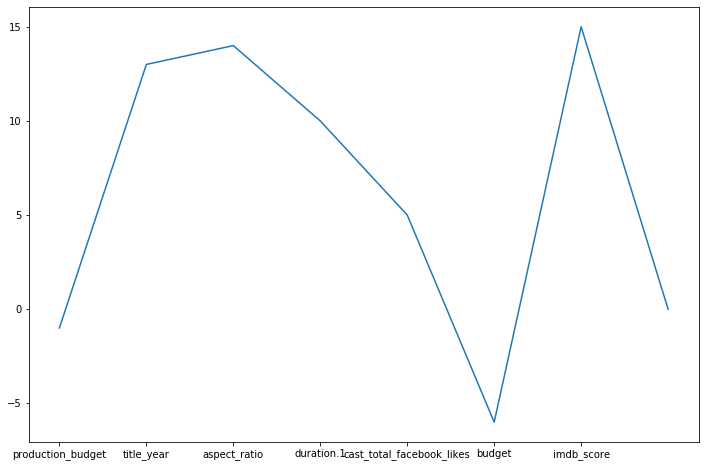

In [11]:
plt.rcParams['figure.figsize']= [12,8]
plt.plot(v)
plt.xticks(np.arange(7),  list(x.columns))


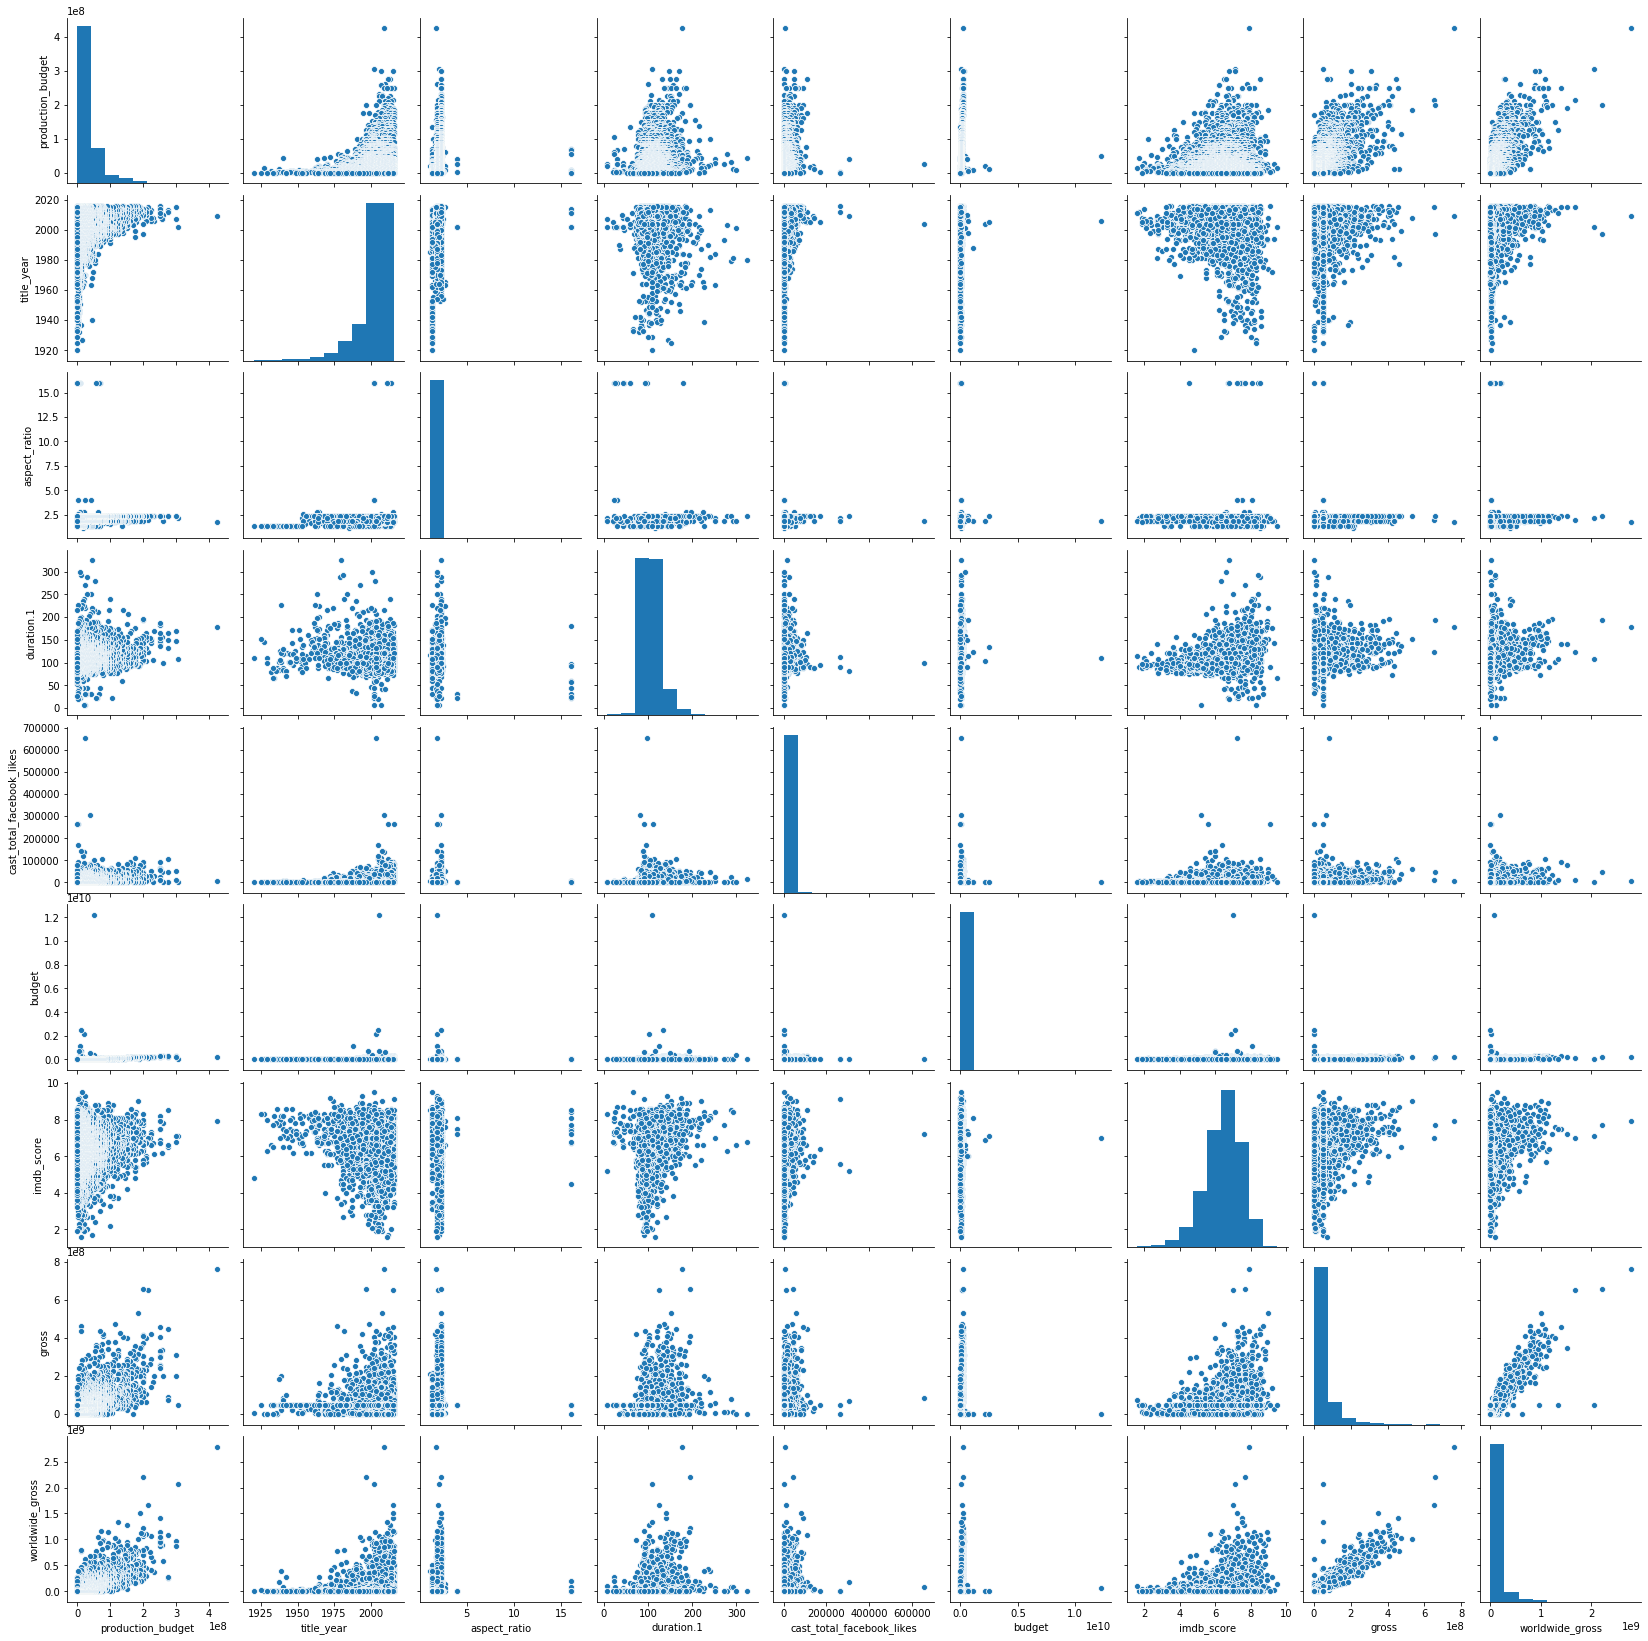

In [12]:
z=pd.concat([x,y], axis=1)
sns.pairplot(z)


C:\Users\root\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\root\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

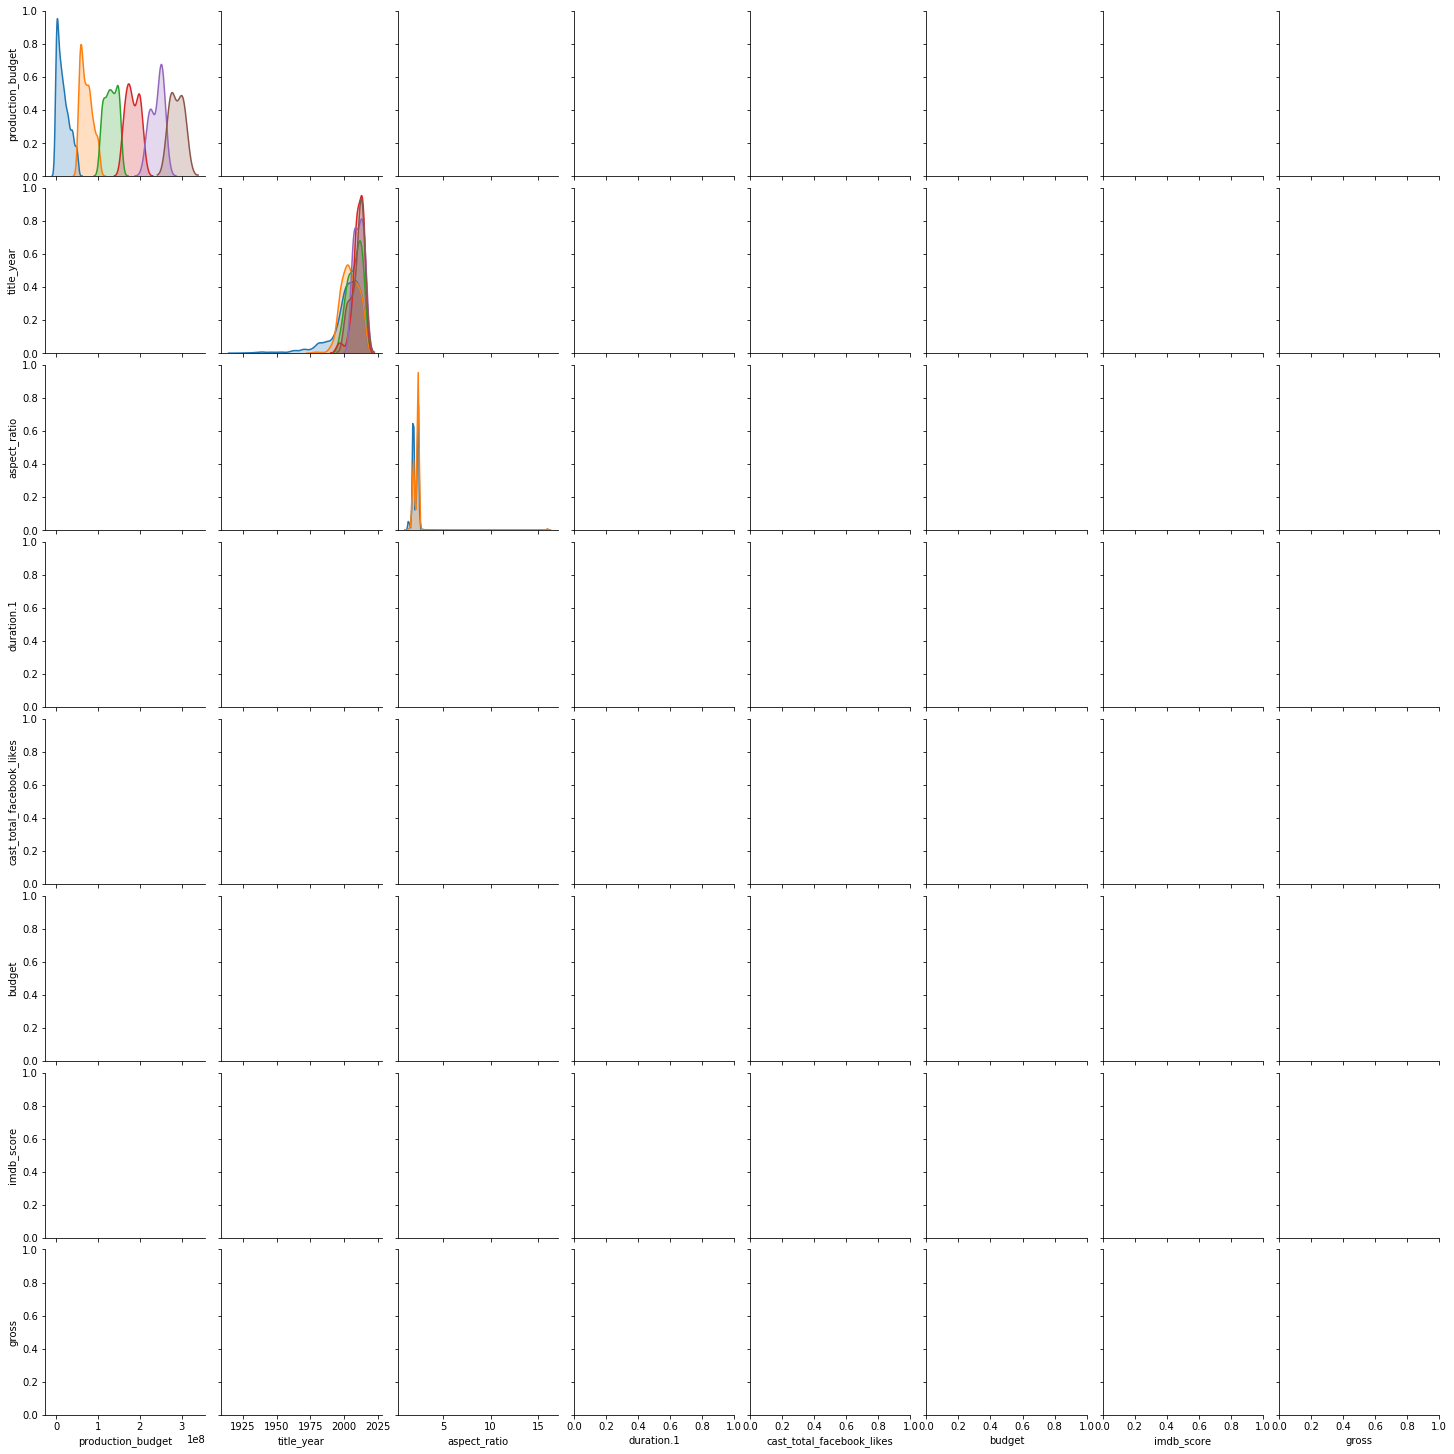

In [13]:
clase= pd.cut(x['production_budget'],8).cat.codes.rename('class')
z2= pd.concat([x,clase], axis=1)

sns.pairplot(z2,hue='class')

In [ ]:
z3=pd.concat([x,y],axis=1)
sns.heatmap(z3.corr())

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector= SelectKBest(mutual_info_regression, k=4)
selector.fit(x,y)


SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x000001949D0F5438>)

['production_budget',
 'title_year',
 'aspect_ratio',
 'duration.1',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'gross']

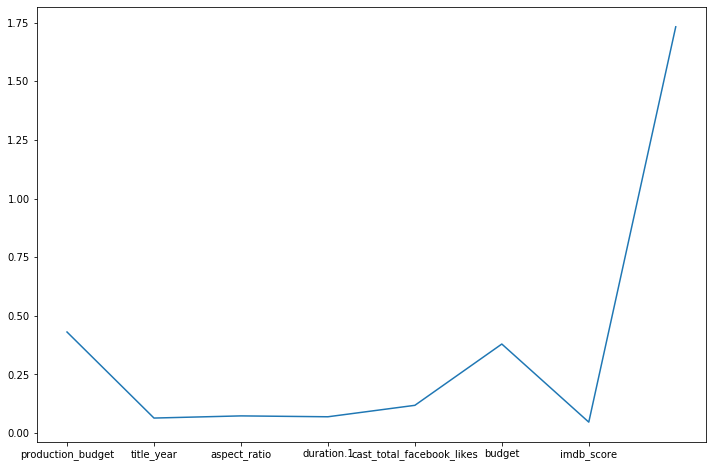

In [19]:
scores=selector.scores_
plt.rcParams['figure.figsize']= [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),  list(x.columns))
list(x.columns)

In [26]:
x2=x[['production_budget', 'title_year', 'duration.1','cast_total_facebook_likes','budget', 'imdb_score']]
x3=x[['production_budget', 'cast_total_facebook_likes', 'imdb_score' ,'gross']]



In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y)
cols2=['production_budget', 'title_year', 'duration.1','cast_total_facebook_likes','budget', 'imdb_score']
x2_train,x2_test,y2_train,y2_test=x_train[cols2],x_test[cols2],y_train,y_test

cols3=['production_budget', 'cast_total_facebook_likes', 'imdb_score']
x3_train,x3_test,y3_train,y3_test=x_train[cols3],x_test[cols3],y_train,y_test

In [33]:
from sklearn.linear_model import Lasso
model1=Lasso()
model2=Lasso()
model3=Lasso()

model1.fit(x_train,y_train)
model2.fit(x2_train,y2_train)
model3.fit(x3_train,y3_train)



C:\Users\root\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.532785096313134e+18, tolerance: 9379615976085216.0
  positive)
C:\Users\root\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0556155361298964e+18, tolerance: 9379615976085216.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
print(model1.score(x_test,y_test))
print(model2.score(x2_test,y2_test))
print(model3.score(x3_test,y3_test))

0.8948289378278519
0.5388352991579669
0.53930407951135
